In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Metric"

query_url = f"{url}&units={units}&appid={weather_api_key}&q="
# Define an empty list to fetch the weather data for each city
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_data.append(city_weather["name"])
        city_lat.append(city_weather["coord"]["lat"])
        city_lng.append(city_weather["coord"]["lon"])
        city_max_temp.append(city_weather["main"]["temp_max"])
        city_humidity.append(city_weather["main"]["humidity"])
        city_clouds.append(city_weather["clouds"]["all"])
        city_wind.append(city_weather["wind"]["speed"])
        city_country.append(city_weather["sys"]["country"])
        city_date.append(city_weather["dt"])

        # Append the City information into city_data list
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bonavista
Processing Record 2 of Set 1 | leningradskiy
Processing Record 3 of Set 1 | methven
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | kavaratti
Processing Record 6 of Set 1 | nome
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | chara
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | zeya
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | atikokan
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | invermere
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | rikitea
Proce

Processing Record 37 of Set 4 | carnarvon
Processing Record 38 of Set 4 | humaita
Processing Record 39 of Set 4 | ankang
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | kortkeros
Processing Record 42 of Set 4 | alakurtti
Processing Record 43 of Set 4 | prescott
Processing Record 44 of Set 4 | yokadouma
Processing Record 45 of Set 4 | zhangye
Processing Record 46 of Set 4 | constitucion
Processing Record 47 of Set 4 | skibbereen
Processing Record 48 of Set 4 | hangu
Processing Record 49 of Set 4 | songea
Processing Record 0 of Set 5 | bara
Processing Record 1 of Set 5 | mega
Processing Record 2 of Set 5 | acarau
Processing Record 3 of Set 5 | butaritari
Processing Record 4 of Set 5 | itarema
Processing Record 5 of Set 5 | dikson
Processing Record 6 of Set 5 | kathmandu
Processing Record 7 of Set 5 | tunduru
City not found. Skipping...
Processing Record 8 of Set 5 | weiser
Processing Record 9 of Set 5 | pevek
Processing Record 10 of Set 5 | clyde river
Processin

Processing Record 28 of Set 8 | oktyabrskiy
Processing Record 29 of Set 8 | iquitos
Processing Record 30 of Set 8 | jabiru
City not found. Skipping...
Processing Record 31 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 32 of Set 8 | guerrero negro
Processing Record 33 of Set 8 | golubitskaya
Processing Record 34 of Set 8 | vardo
Processing Record 35 of Set 8 | chifeng
Processing Record 36 of Set 8 | nguiu
City not found. Skipping...
Processing Record 37 of Set 8 | marawi
Processing Record 38 of Set 8 | gourdon
Processing Record 39 of Set 8 | nelson bay
Processing Record 40 of Set 8 | bambanglipuro
Processing Record 41 of Set 8 | port macquarie
Processing Record 42 of Set 8 | zaria
Processing Record 43 of Set 8 | nizwa
Processing Record 44 of Set 8 | alyangula
Processing Record 45 of Set 8 | akdepe
Processing Record 46 of Set 8 | palmer
Processing Record 47 of Set 8 | neuquen
Processing Record 48 of Set 8 | kodiak
Processing Record 49 of Set 8 | tara
Processing Record

Processing Record 18 of Set 12 | san felipe
Processing Record 19 of Set 12 | naftah
City not found. Skipping...
Processing Record 20 of Set 12 | awjilah
Processing Record 21 of Set 12 | micheweni
Processing Record 22 of Set 12 | viedma
Processing Record 23 of Set 12 | half moon bay
Processing Record 24 of Set 12 | coquimbo
Processing Record 25 of Set 12 | rock springs
Processing Record 26 of Set 12 | toliary
City not found. Skipping...
Processing Record 27 of Set 12 | catamarca
Processing Record 28 of Set 12 | barra do garcas
Processing Record 29 of Set 12 | okulovka
Processing Record 30 of Set 12 | prince rupert
Processing Record 31 of Set 12 | martapura
Processing Record 32 of Set 12 | zajecar
Processing Record 33 of Set 12 | grand gaube
Processing Record 34 of Set 12 | tanete
Processing Record 35 of Set 12 | praia da vitoria
Processing Record 36 of Set 12 | golden
Processing Record 37 of Set 12 | achisay
City not found. Skipping...
Processing Record 38 of Set 12 | ixtapa
Processing 

In [28]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = {
    "City": city_data, 
    "Lat": city_lat, 
    "Lng": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date}

# Show Record Count
city_data_df = pd.DataFrame(city_data_df)
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [29]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bonavista,48.6499,-53.1147,-3.15,62,46,2.84,CA,1674929201
1,Leningradskiy,69.3833,178.4167,-16.76,94,100,5.14,RU,1674929124
2,Methven,-43.6333,171.6500,9.95,99,0,1.47,NZ,1674929202
3,Pisco,-13.7000,-76.2167,24.03,78,0,4.12,PE,1674929202
4,Kavaratti,10.5669,72.6420,26.58,72,4,3.95,IN,1674929202


In [30]:
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bonavista,48.6499,-53.1147,-3.15,62,46,2.84,CA,1674929201
1,Leningradskiy,69.3833,178.4167,-16.76,94,100,5.14,RU,1674929124
2,Methven,-43.6333,171.6500,9.95,99,0,1.47,NZ,1674929202
3,Pisco,-13.7000,-76.2167,24.03,78,0,4.12,PE,1674929202
4,Kavaratti,10.5669,72.6420,26.58,72,4,3.95,IN,1674929202


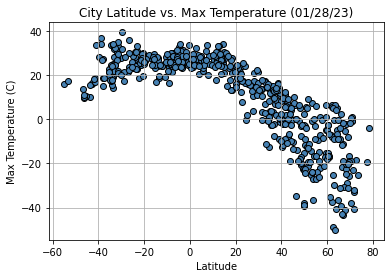

In [32]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_lat
y_values = city_max_temp
# Incorporate the other graph properties
# YOUR CODE HERE

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime ("%x"))
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

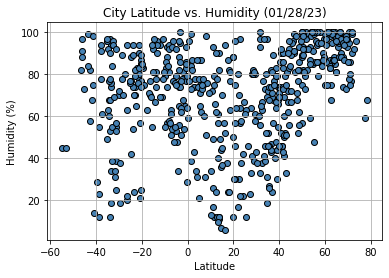

In [33]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_lat
y_values = city_humidity
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime ("%x"))
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

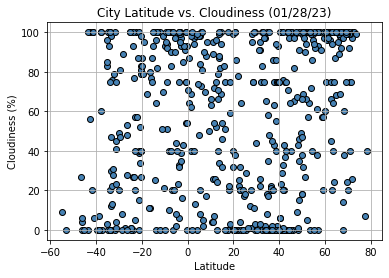

In [34]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_lat
y_values = city_clouds
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime ("%x"))
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

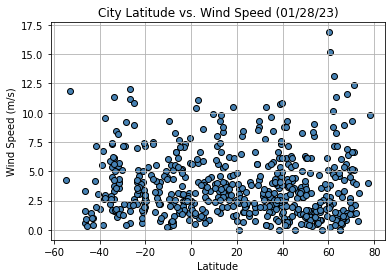

In [35]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_lat
y_values = city_wind
# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime ("%x"))
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Bonavista,48.6499,-53.1147,-3.15,62,46,2.84,CA,1674929201
1,Leningradskiy,69.3833,178.4167,-16.76,94,100,5.14,RU,1674929124
4,Kavaratti,10.5669,72.6420,26.58,72,4,3.95,IN,1674929202
5,Nome,64.5011,-165.4064,-4.91,100,100,4.63,US,1674929009
6,Bethel,41.3712,-73.4140,10.48,46,0,6.17,US,1674929201


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Methven,-43.6333,171.6500,9.95,99,0,1.47,NZ,1674929202
3,Pisco,-13.7000,-76.2167,24.03,78,0,4.12,PE,1674929202
9,Busselton,-33.6500,115.3333,13.86,74,30,6.12,AU,1674929048
10,Bluff,-46.6000,168.3333,13.79,82,27,3.28,NZ,1674929204
12,Faanui,-16.4833,-151.7500,27.42,70,11,7.48,PF,1674929204


The r-value is: -0.8336967901366636


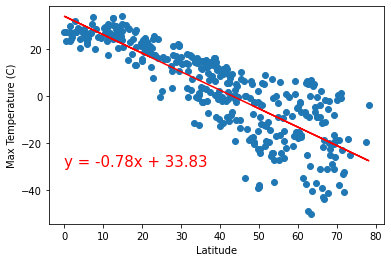

In [42]:
# Linear regression on Northern Hemisphere(Temperature v. Latitude)
# YOUR CODE HERE
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.40964597373867434


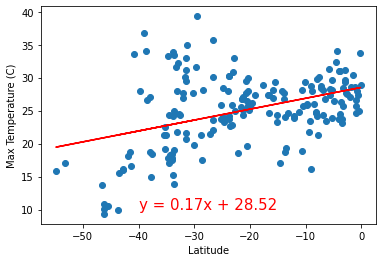

In [41]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

print(f"The r-value is: {rvalue}")

plt.show()

### 
When compared across hemispheres Max Temperature has a negative relationship with latitude, while the southern hemisphere has a slightly positive relation with Latitude as it approaches 0

The r-value is: 0.5235079554698839


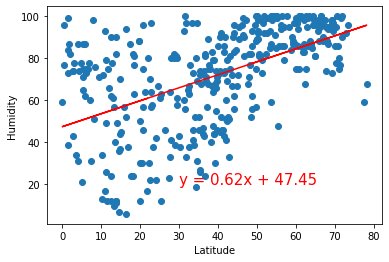

In [44]:
# Northern Hemisphere (Humidity v. Latitude)
# YOUR CODE HERE
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.14860188625259999


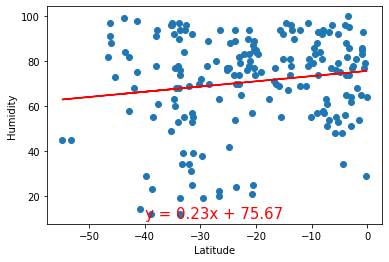

In [45]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

### 
Both hemispheres have a positive correlation between Latitude and Humidity; however, the correlation is much stronger in the northern hemisphere.

The r-value is: 0.23951917618442214


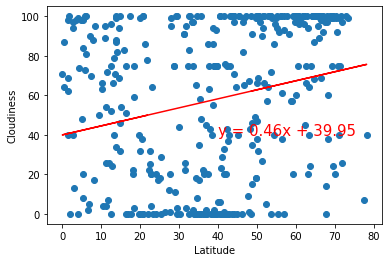

In [48]:
# Northern Hemisphere(Cloudiness v. Latitude)
# YOUR CODE HERE
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.2865319253337826


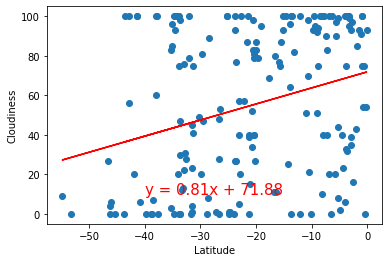

In [51]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

plt.show()

### 
Both hemispheres have a positive correlation between Latitude and Humidity; however, the correlation is much stronger in the southern hemisphere.

The r-value is: -0.019788334074844007


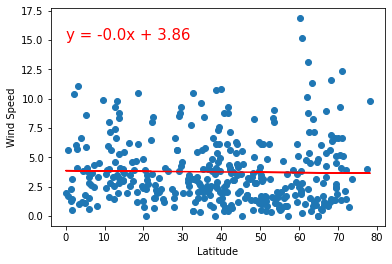

In [53]:
# Northern Hemisphere(Wind v. Latitude)
# YOUR CODE HERE
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.07370227101071784


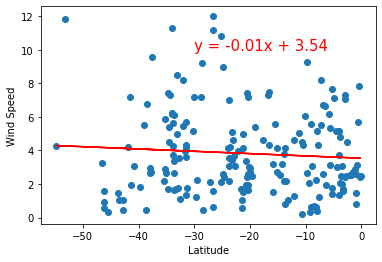

In [56]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

### 
There is no correlation between Wind and Latitude for either hemisphere based on the data collected during this project.